<a href="https://colab.research.google.com/github/shreyapande1/Python/blob/main/Data_Cleaning_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FBI Uniform Crime Reporting Analysis | 2012



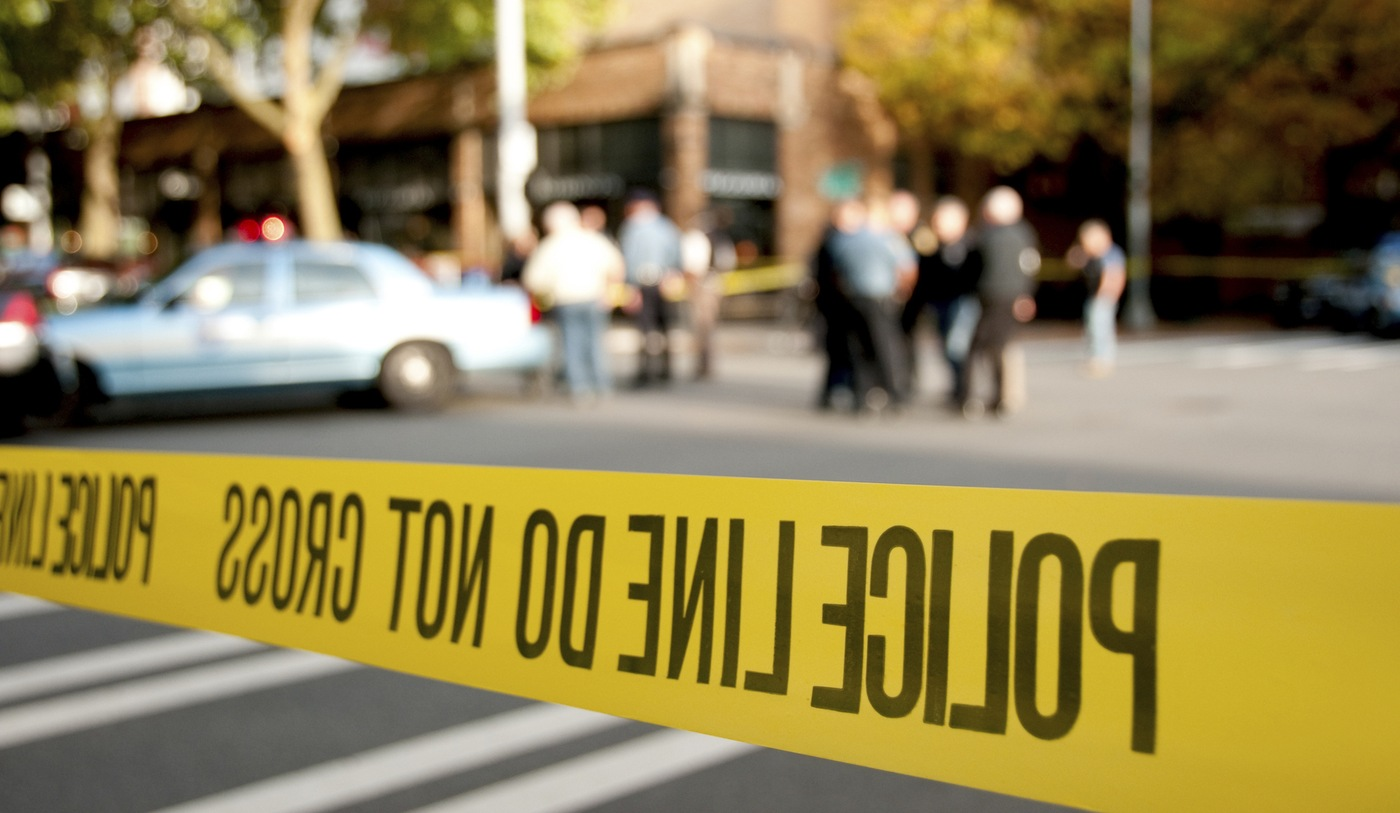

[Image Source](https://www.fbi.gov/news/stories/latest-crime-statistics-released)

># **1- Importing dataset and libraries**
---

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.graph_objects as go
%matplotlib inline

In [5]:
from google.colab import files
file = files.upload() # upload file into google colab session

Saving U.S._Offense_Type_by_Agency_2012.xlsx to U.S._Offense_Type_by_Agency_2012.xlsx


In [ ]:
df = pd.read_excel("U.S._Offense_Type_by_Agency_2012.xlsx", header=[0, 1])
df.head(2) 

United States                                               \
      Offense Type Offense Type.1 Offense Type.2 Offense Type.3   
0  by Agency, 2012            NaN            NaN            NaN   
1            State    Agency Type    Agency Name    Population1   

                                                                        \
           Offense Type.4 Offense Type.5 Offense Type.6 Offense Type.7   
0                     NaN            NaN            NaN            NaN   
1  Crimes Against Persons            NaN            NaN            NaN   

                                 ...                                  \
  Offense Type.8 Offense Type.9  ... Offense Type.49 Offense Type.50   
0            NaN            NaN  ...             NaN             NaN   
1            NaN            NaN  ...             NaN             NaN   

                                                                   \
  Offense Type.51 Offense Type.52 Offense Type.53 Offense Type.54   
0             NaN             NaN             NaN             NaN   
1             NaN             NaN             NaN             NaN   

                                                                   
  Offense Type.55 Offense Type.56 Offense Type.57 Offense Type.58  
0             NaN             NaN             NaN             NaN  
1             NaN             NaN             NaN             NaN  

[2 rows x 59 columns]

In [ ]:
# the excel file has merged columns, in this section we get the required values in same level
df.columns = ['_'.join(col).strip() for col in df.columns.values] 

In [ ]:
#df.head()

In [ ]:
df.loc[2, 'United States_Offense Type'] = df.loc[1, 'United States_Offense Type']
df.loc[2, 'United States_Offense Type.1'] = df.loc[1, 'United States_Offense Type.1']
df.loc[2, 'United States_Offense Type.2'] = df.loc[1, 'United States_Offense Type.2']
df.loc[2, 'United States_Offense Type.3'] = df.loc[1, 'United States_Offense Type.3']
# getting all the required column values in one level

In [ ]:
#df

In [ ]:
df = df.drop(index=[0,1]) # dropping 1 st few rows

In [ ]:
df.columns = df.iloc[0]

In [ ]:
df = df.drop(index=2)

In [ ]:
df.head(5)

2,State,Agency Type,Agency Name,Population1,Assault\nOffenses,Aggravated\nAssault,Simple\nAssault,Intimidation,Homicide\nOffenses,Murder and Nonnegligent Manslaughter,...,Gambling\nOffenses,Betting/\nWagering,Operating/\nPromoting/\nAssisting\nGambling,Gambling\nEquipment\nViolations,Sports\nTampering,Porno-\ngraphy/\nObscene\nMaterial,Prost-\nitution\nOffenses,Prost-\nitution,Assisting\nor Pro-\nmoting\nProst-\nitution,Weapon\nLaw\nViolations
3,ALABAMA,Cities,Hoover,82332,870,25,594,251,2,2,...,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,26
4,ARIZONA,Cities,Apache Junction,36986,559,96,381,82,1,1,...,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,25
5,NaN,NaN,Gilbert,214264,1242,123,892,227,5,5,...,NaN,NaN,NaN,NaN,NaN,16,NaN,NaN,NaN,75
6,NaN,Metropolitan Counties,Yuma2,NaN,555,94,376,85,26,26,...,NaN,NaN,NaN,NaN,NaN,5,2,1,1,40
7,ARKANSAS,Cities,Alma,5439,197,11,108,78,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,4


In [ ]:
adj_df = df.copy() # getting a copy of dataset

In [ ]:
adj_df['State'] = adj_df['State'].fillna(method='ffill')

In [ ]:
adj_df['Agency Type'] = adj_df['Agency Type'].fillna(method='ffill') # forward filling the NA columns
adj_df['Agency Name'] = adj_df['Agency Name'].fillna(method='ffill')

In [ ]:
adj_df.head()

2,State,Agency Type,Agency Name,Population1,Assault\nOffenses,Aggravated\nAssault,Simple\nAssault,Intimidation,Homicide\nOffenses,Murder and Nonnegligent Manslaughter,...,Gambling\nOffenses,Betting/\nWagering,Operating/\nPromoting/\nAssisting\nGambling,Gambling\nEquipment\nViolations,Sports\nTampering,Porno-\ngraphy/\nObscene\nMaterial,Prost-\nitution\nOffenses,Prost-\nitution,Assisting\nor Pro-\nmoting\nProst-\nitution,Weapon\nLaw\nViolations
3,ALABAMA,Cities,Hoover,82332,870,25,594,251,2,2,...,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,26
4,ARIZONA,Cities,Apache Junction,36986,559,96,381,82,1,1,...,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,25
5,ARIZONA,Cities,Gilbert,214264,1242,123,892,227,5,5,...,NaN,NaN,NaN,NaN,NaN,16,NaN,NaN,NaN,75
6,ARIZONA,Metropolitan Counties,Yuma2,NaN,555,94,376,85,26,26,...,NaN,NaN,NaN,NaN,NaN,5,2,1,1,40
7,ARKANSAS,Cities,Alma,5439,197,11,108,78,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,4


In [ ]:
adj_df = adj_df.drop(index=adj_df.index[-4:]) 
# removing last 4 rows as they are not a part of our dataset

In [ ]:
adj_df.head()

2,State,Agency Type,Agency Name,Population1,Assault\nOffenses,Aggravated\nAssault,Simple\nAssault,Intimidation,Homicide\nOffenses,Murder and Nonnegligent Manslaughter,...,Gambling\nOffenses,Betting/\nWagering,Operating/\nPromoting/\nAssisting\nGambling,Gambling\nEquipment\nViolations,Sports\nTampering,Porno-\ngraphy/\nObscene\nMaterial,Prost-\nitution\nOffenses,Prost-\nitution,Assisting\nor Pro-\nmoting\nProst-\nitution,Weapon\nLaw\nViolations
3,ALABAMA,Cities,Hoover,82332,870,25,594,251,2,2,...,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,26
4,ARIZONA,Cities,Apache Junction,36986,559,96,381,82,1,1,...,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,25
5,ARIZONA,Cities,Gilbert,214264,1242,123,892,227,5,5,...,NaN,NaN,NaN,NaN,NaN,16,NaN,NaN,NaN,75
6,ARIZONA,Metropolitan Counties,Yuma2,NaN,555,94,376,85,26,26,...,NaN,NaN,NaN,NaN,NaN,5,2,1,1,40
7,ARKANSAS,Cities,Alma,5439,197,11,108,78,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,4


In [ ]:
# Now that we have rows and columns in place, let's clean the data and have a look at it

In [ ]:
# Size of the dataframe
adj_df.shape

(5235, 59)

In [ ]:
# Loads of missing values, quantifying those

In [ ]:
adj_df.isnull().any().sum()

56

## Que - A

Top 5 states with highest number of Assault offenses registered in all the agency types except cities. (Show pivot of sub-types of Assault offenses)

In [ ]:
crime_df = adj_df[adj_df['Agency Type'] != 'Cities']

In [ ]:
offense_cols = [col for col in crime_df.columns if '%Assault%' in col]
crime_df['Offense Type'] = crime_df[offense_cols].apply(lambda x: ', '.join(x.dropna().astype(str)), axis=1)

<ipython-input-86-1b4446728f9f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_df['Offense Type'] = crime_df[offense_cols].apply(lambda x: ', '.join(x.dropna().astype(str)), axis=1)


In [ ]:
assault_df = crime_df[crime_df['Offense Type'].str.contains('Assault')]

In [ ]:
grouped_df = assault_df.groupby(['State', 'Offense Type', 'Agency Type']).size().reset_index(name='Count')

In [ ]:
pivot_table = grouped_df.pivot(index=['State', 'Offense Type'], columns='Agency Type', values='Count')

In [ ]:
adj_df['Agency Type'].unique()

array(['Cities', 'Metropolitan Counties', 'Universities and Colleges',
       'Nonmetropolitan Counties', 'Other Agencies',
       'State Police Agencies', 'Other Agencies - Tribal'], dtype=object)

In [ ]:
adj_df.iloc[:, 4:] = adj_df.iloc[:, 4:].apply(pd.to_numeric, errors='coerce')

In [ ]:
grouped = adj_df[adj_df['Agency Type'] != 'Cities'].groupby('State')['Assault\nOffenses'].sum()
sorted_result = grouped.sort_values(ascending=False)

In [ ]:
top5 = sorted_result.head(5)
top5

State
SOUTH CAROLINA    52862.0
VIRGINIA          47129.0
TENNESSEE         33657.0
MICHIGAN          32420.0
OHIO              20224.0
Name: Assault\nOffenses, dtype: float64

In [ ]:
states = ['SOUTH CAROLINA', 'VIRGINIA', 'TENNESSEE', 'MICHIGAN', 'OHIO']
filter = adj_df[(adj_df['State'].isin(states)) & (adj_df['Agency Type'] != 'Cities')]

In [ ]:
adj_df.columns

Index(['State', 'Agency Type', 'Agency Name', 'Population1',
       'Assault\nOffenses', 'Aggravated\nAssault', 'Simple\nAssault',
       'Intimidation', 'Homicide\nOffenses',
       'Murder and Nonnegligent Manslaughter', 'Negligent\nManslaughter',
       'Justifiable\nHomicide', 'Kidnapping/\nAbduction', 'Sex\nOffenses',
       'Rape', 'Sodomy', 'Sexual\nAssault\nWith An\nObject', 'Fondling',
       'Sex\nOffenses,\nNonforcible', 'Incest', 'Statutory\nRape', 'Arson',
       'Bribery', 'Burglary/\nBreaking &\nEntering',
       'Counter-\nfeiting/\nForgery', 'Destruction/\nDamage/\nVandalism',
       'Embezzle-\nment', 'Extortion/\nBlackmail', 'Fraud\nOffenses',
       'False\nPretenses/\nSwindle/\nConfidence\nGame',
       'Credit Card/\nAutomated\nTeller\nMachine Fraud', 'Imperson-\nation',
       'Welfare\nFraud', 'Wire\nFraud', 'Larceny-\nTheft\nOffenses',
       'Pocket-\npicking', 'Purse-\nsnatching', 'Shop-\nlifting',
       'Theft\nFrom\nBuilding', 'Theft\nFrom\nCoin-\noperated

In [ ]:
X = adj_df[["Population1", "Drug/\nNarcotic\nOffenses", "Drug/\nNarcotic\nViolations", "Drug\nEquipment\nViolations", "Theft\nFrom\nBuilding", "Theft\nFrom\nCoin-\noperated\nMachine", "Theft\nFrom\nMotor\nVehicle", "Theft of\nMotor\nVehicle\nParts or\nAccessories"]]

In [ ]:
CAP_count = 0
CAP_type_count = 0
CAS_count = 0
CAS_type_count = 0
CAP_unique_types = []
CAS_unique_types = []

In [ ]:
# Loop through each row of the dataset
for index, row in adj_df.iterrows():
    offense_code = row['UCR Offense Code']
    victim_count = row['Victim Segment']

In [ ]:
# Determine offense type based on UCR offense code
    if offense_code.startswith('09'):  # Crimes Against Persons
        CAP_count += victim_count
        if row['Offense Type'] not in CAP_unique_types:
            CAP_unique_types.append(row['Offense Type'])
            CAP_type_count += 1
    elif offense_code.startswith('2'):  # Crimes Against Property
        if row['Offense Type'] not in CAP_unique_types:
            CAP_unique_types.append(row['Offense Type'])
            CAP_type_count += 1
    elif offense_code.startswith('3'):  # Crimes Against Society
        if row['Offense Type'] not in CAS_unique_types:
            CAS_unique_types.append(row['Offense Type'])
            CAS_type_count += 1